## 6. Feature category imputation

### how to handle categorical missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = pd.read_csv('loan.csv',usecols=['Gender','Married','Self_Employed'])

In [8]:
df.head()

,Gender,Married,Self_Employed
0,Male,No,No
1,Male,Yes,No
2,Male,Yes,Yes
3,Male,Yes,No
4,Male,No,No


In [9]:
df.isnull().sum()

Gender           13
Married           3
Self_Employed    32
dtype: int64

In [11]:
df.isnull().mean().sort_values(ascending=True)   # to get the mean values in sorting formats

Married          0.004886
Gender           0.021173
Self_Employed    0.052117
dtype: float64

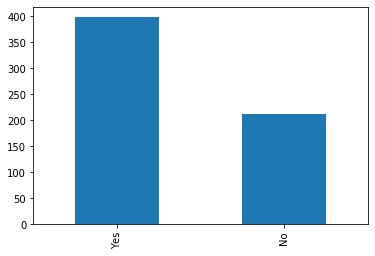

In [13]:
df['Married'].value_counts().plot.bar()

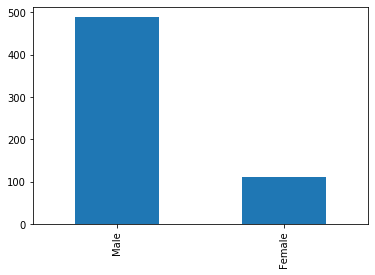

In [14]:
df['Gender'].value_counts().plot.bar()

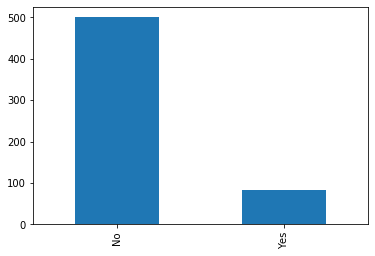

In [16]:
df['Self_Employed'].value_counts().plot.bar()

In [17]:
df['Gender'].mode()[0]  # to replace mode value 

'Male'

In [22]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [23]:
for feature in ['Gender','Married','Self_Employed']:
    impute_nan(df,feature)

In [24]:
df.isnull().mean()

Gender           0.0
Married          0.0
Self_Employed    0.0
dtype: float64

## 2. Adding a new variable to capture Nan

In [25]:
df = pd.read_csv('loan.csv',usecols=['Gender','Married','Self_Employed'])
df.head()

,Gender,Married,Self_Employed
0,Male,No,No
1,Male,Yes,No
2,Male,Yes,Yes
3,Male,Yes,No
4,Male,No,No


In [26]:
df.isnull().sum()

Gender           13
Married           3
Self_Employed    32
dtype: int64

In [27]:
df['Self_Employed_var']=np.where(df['Self_Employed'].isnull(),1,0)

In [28]:
df.head()

,Gender,Married,Self_Employed,Self_Employed_var
0,Male,No,No,0
1,Male,Yes,No,0
2,Male,Yes,Yes,0
3,Male,Yes,No,0
4,Male,No,No,0


In [31]:
frequent=df['Self_Employed'].mode()[0]
frequent

'No'

In [32]:
df['Self_Employed'].fillna(frequent)    # To fill the frequent values

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [35]:
df.head(100)

,Gender,Married,Self_Employed,Self_Employed_var
0,Male,No,No,0
1,Male,Yes,No,0
2,Male,Yes,Yes,0
3,Male,Yes,No,0
4,Male,No,No,0
...,...,...,...,...
95,Male,No,NaN,1
96,Female,Yes,No,0
97,Male,Yes,No,0
98,Male,Yes,No,0


In [36]:
df['Gender_var']=np.where(df['Gender'].isnull(),1,0)   # nan values are replace to 1 and 0
frequent=df['Gender'].mode()[0]
df['Gender'].fillna(frequent,inplace=True)

In [38]:
df['Married_Var']=np.where(df['Married'].isnull(),1,0)
frequent=df['Married'].mode()[0]
df['Married'].fillna(frequent,inplace=True)

In [40]:
df.head(100)

,Gender,Married,Self_Employed,Self_Employed_var,Gender_var,Married_Var
0,Male,No,No,0,0,0
1,Male,Yes,No,0,0,0
2,Male,Yes,Yes,0,0,0
3,Male,Yes,No,0,0,0
4,Male,No,No,0,0,0
...,...,...,...,...,...,...
95,Male,No,NaN,1,0,0
96,Female,Yes,No,0,0,0
97,Male,Yes,No,0,0,0
98,Male,Yes,No,0,0,0


## Suppose if you have more frequent categories, we just replace NAN with a new category

In [41]:
df = pd.read_csv('loan.csv',usecols=['Gender','Married','Self_Employed'])
df.head()

,Gender,Married,Self_Employed
0,Male,No,No
1,Male,Yes,No
2,Male,Yes,Yes
3,Male,Yes,No
4,Male,No,No


In [42]:
def impute_nan(df,variable):   # nan value  are replace to missing
    df[variable+"_new_val"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [43]:
for feature in ['Gender','Married','Self_Employed']:
    impute_nan(df,feature)

In [44]:
df.head(100)

,Gender,Married,Self_Employed,Gender_new_val,Married_new_val,Self_Employed_new_val
0,Male,No,No,Male,No,No
1,Male,Yes,No,Male,Yes,No
2,Male,Yes,Yes,Male,Yes,Yes
3,Male,Yes,No,Male,Yes,No
4,Male,No,No,Male,No,No
...,...,...,...,...,...,...
95,Male,No,NaN,Male,No,Missing
96,Female,Yes,No,Female,Yes,No
97,Male,Yes,No,Male,Yes,No
98,Male,Yes,No,Male,Yes,No


In [46]:
df= df.drop(['Gender','Married','Self_Employed'],axis=1)  # To drop the columns

In [47]:
df.head(100)   # only display new columns

,Gender_new_val,Married_new_val,Self_Employed_new_val
0,Male,No,No
1,Male,Yes,No
2,Male,Yes,Yes
3,Male,Yes,No
4,Male,No,No
...,...,...,...
95,Male,No,Missing
96,Female,Yes,No
97,Male,Yes,No
98,Male,Yes,No
